# Load data

In [1]:
import json
from collections import Counter
from pprint import pprint

# Đọc file JSON
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

dataset = load_json('dataset_multiwoz.json')

# Statistic

In [46]:
for item in dataset['train']:
    print(item)

print('-' * 50)
    
for item in dataset['train']['services']:
    print(item)
    break

for item in dataset['train']['turns']:
    print(item)
    break

for item in dataset['train']['turns']:
    print(item.keys())
    print(item['frames'])
    print(item['dialogue_acts'])
    break

for item in dataset['train']['turns']:
    print(item)
    break

dialogue_id
services
turns
--------------------------------------------------
['restaurant', 'hotel']
{'turn_id': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], 'speaker': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 'utterance': ['i need a place to dine in the center thats expensive', 'I have several options for you; do you prefer African, Asian, or British food?', 'Any sort of food would be fine, as long as it is a bit expensive. Could I get the phone number for your recommendation?', 'There is an Afrian place named Bedouin in the centre. How does that sound?', 'Sounds good, could I get that phone number? Also, could you recommend me an expensive hotel?', "Bedouin's phone is 01223367660. As far as hotels go, I recommend the University Arms Hotel in the center of town.", 'Yes. Can you book it for me?', 'Sure, when would you like that reservation?', 'i want to book it for 2 people and 2 nights starting from saturday.', 'Your booking was successful. Your reference number is FR

In [ ]:
for item in dataset['train']['turns']:
    print(item.keys())
    print(item['dialogue_acts'])
    break

dict_keys(['turn_id', 'speaker', 'utterance', 'frames', 'dialogue_acts'])
[{'dialog_act': {'act_type': ['Restaurant-Inform'], 'act_slots': [{'slot_name': ['area', 'pricerange'], 'slot_value': ['centre', 'expensive']}]}, 'span_info': {'act_type': ['Restaurant-Inform', 'Restaurant-Inform'], 'act_slot_name': ['area', 'pricerange'], 'act_slot_value': ['centre', 'expensive'], 'span_start': [30, 43], 'span_end': [36, 52]}}, {'dialog_act': {'act_type': ['Restaurant-Inform', 'Restaurant-Select'], 'act_slots': [{'slot_name': ['choice'], 'slot_value': ['several']}, {'slot_name': ['food', 'food', 'food'], 'slot_value': ['African', 'Asian', 'British']}]}, 'span_info': {'act_type': ['Restaurant-Inform', 'Restaurant-Select', 'Restaurant-Select', 'Restaurant-Select'], 'act_slot_name': ['choice', 'food', 'food', 'food'], 'act_slot_value': ['several', 'African', 'Asian', 'British'], 'span_start': [7, 46, 55, 65], 'span_end': [14, 53, 60, 72]}}, {'dialog_act': {'act_type': ['Restaurant-Request'], 'act_s

In [22]:
from collections import Counter

def get_data_stat(dataset):
    data_stat = {
        'train_len': len(dataset['train']['services']),
        'validation_len': len(dataset['validation']['services']),
        'test_len': len(dataset['test']['services']),
        'train_services': set(),
        'validation_services': set(),
        'test_services': set(),
        'train_act_types': Counter(),
        'validation_act_types': Counter(),
        'test_act_types': Counter(),
        'train_act_slots': Counter(),
        'validation_act_slots': Counter(),
        'test_act_slots': Counter(),
    }

    for split in ['train', 'validation', 'test']:
        # Get all services in the dataset
        for services in dataset[split]['services']:
            data_stat[split + '_services'].update(services)  # Thêm tất cả dịch vụ vào tập hợp
        
        # Get all act_types, all act_slots in each split
        for dialog in dataset[split]['turns']:
            for act in dialog.get('dialogue_acts', []):  # Kiểm tra tồn tại 'dialogue_acts'
                act_type = act.get('dialog_act', {}).get('act_type', [])
                data_stat[split + '_act_types'].update(act_type)  # Đếm loại hành động
                
                for slot in act.get('dialog_act', {}).get('act_slots', []):
                    slot_name = slot.get('slot_name', [])
                    data_stat[split + '_act_slots'].update(slot_name)  # Đếm tên slot

    return data_stat


In [33]:
data_stat = get_data_stat(dataset)
# print(data_stat)

# In các khóa của data_stat
print(sorted(data_stat.keys()))  # Sử dụng `sorted` để sắp xếp các khóa theo thứ tự
print()

# In số lượng dữ liệu trong train, validation, test
print("Train - len:", data_stat['train_len'])
print("Val   - len:", data_stat['validation_len'])
print("Test  - len:", data_stat['test_len'])
print()

# In các dịch vụ trong train, validation, test
print("Train - services:", sorted(data_stat['train_services']))
print("Val   - services:", sorted(data_stat['validation_services']))
print("Test  - services:", sorted(data_stat['test_services']))
print()

# In các act_types (các loại hành động)
print("Train - act types:", sorted(data_stat['train_act_types'].keys()))
print("Val   - act types:", sorted(data_stat['validation_act_types'].keys()))
print("Test  - act types:", sorted(data_stat['test_act_types'].keys()))
print()

# In các act_slots (các tên slot trong hành động)
print("Train - act slots:", sorted(data_stat['train_act_slots'].keys()))
print("Val   - act slots:", sorted(data_stat['validation_act_slots'].keys()))
print("Test  - act slots:", sorted(data_stat['test_act_slots'].keys()))


['test_act_slots', 'test_act_types', 'test_len', 'test_services', 'train_act_slots', 'train_act_types', 'train_len', 'train_services', 'validation_act_slots', 'validation_act_types', 'validation_len', 'validation_services']

Train - len: 8437
Val   - len: 1000
Test  - len: 1000

Train - services: ['attraction', 'bus', 'hospital', 'hotel', 'restaurant', 'taxi', 'train']
Val   - services: ['attraction', 'hospital', 'hotel', 'restaurant', 'taxi', 'train']
Test  - services: ['attraction', 'hotel', 'restaurant', 'taxi', 'train']

Train - act types: ['Attraction-Inform', 'Attraction-NoOffer', 'Attraction-Recommend', 'Attraction-Request', 'Attraction-Select', 'Booking-Book', 'Booking-Inform', 'Booking-NoBook', 'Booking-Request', 'Hospital-Inform', 'Hospital-Request', 'Hotel-Inform', 'Hotel-NoOffer', 'Hotel-Recommend', 'Hotel-Request', 'Hotel-Select', 'Police-Inform', 'Police-Request', 'Restaurant-Inform', 'Restaurant-NoOffer', 'Restaurant-Recommend', 'Restaurant-Request', 'Restaurant-Select',

# Visual statistic

In [39]:
# %pip install matplotlib_venn

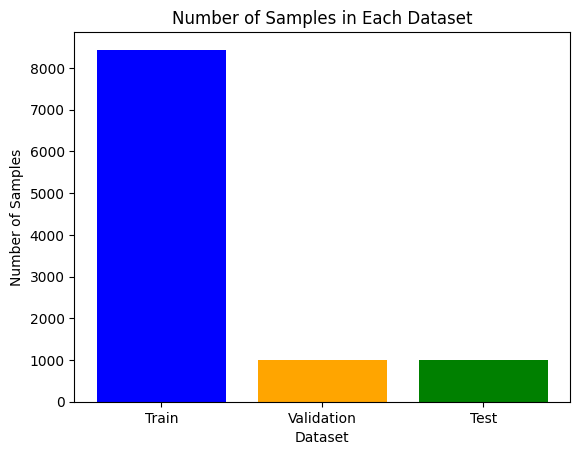

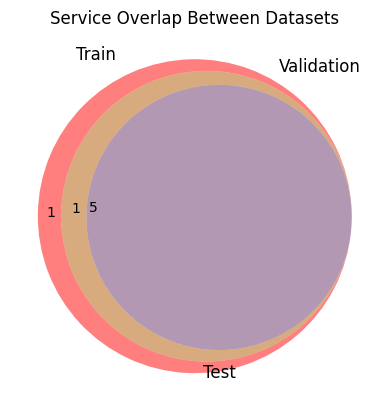

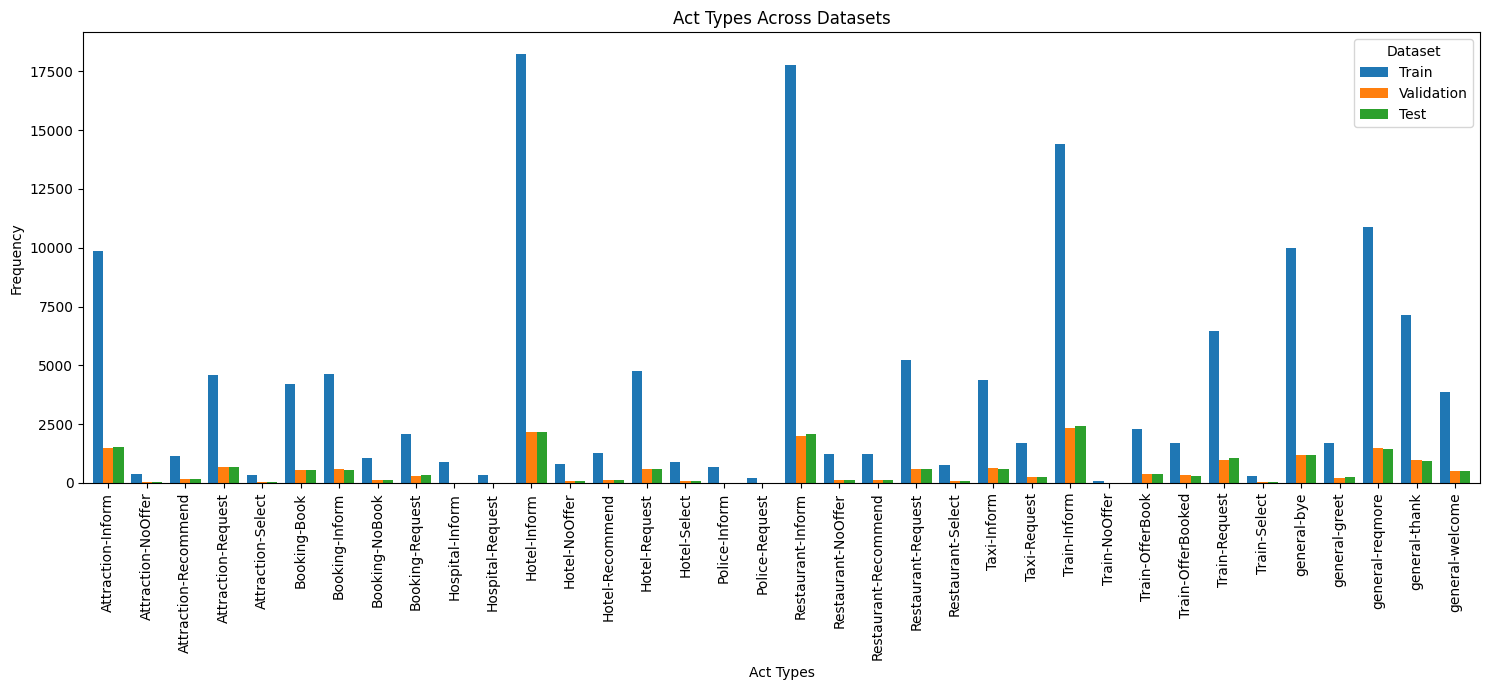

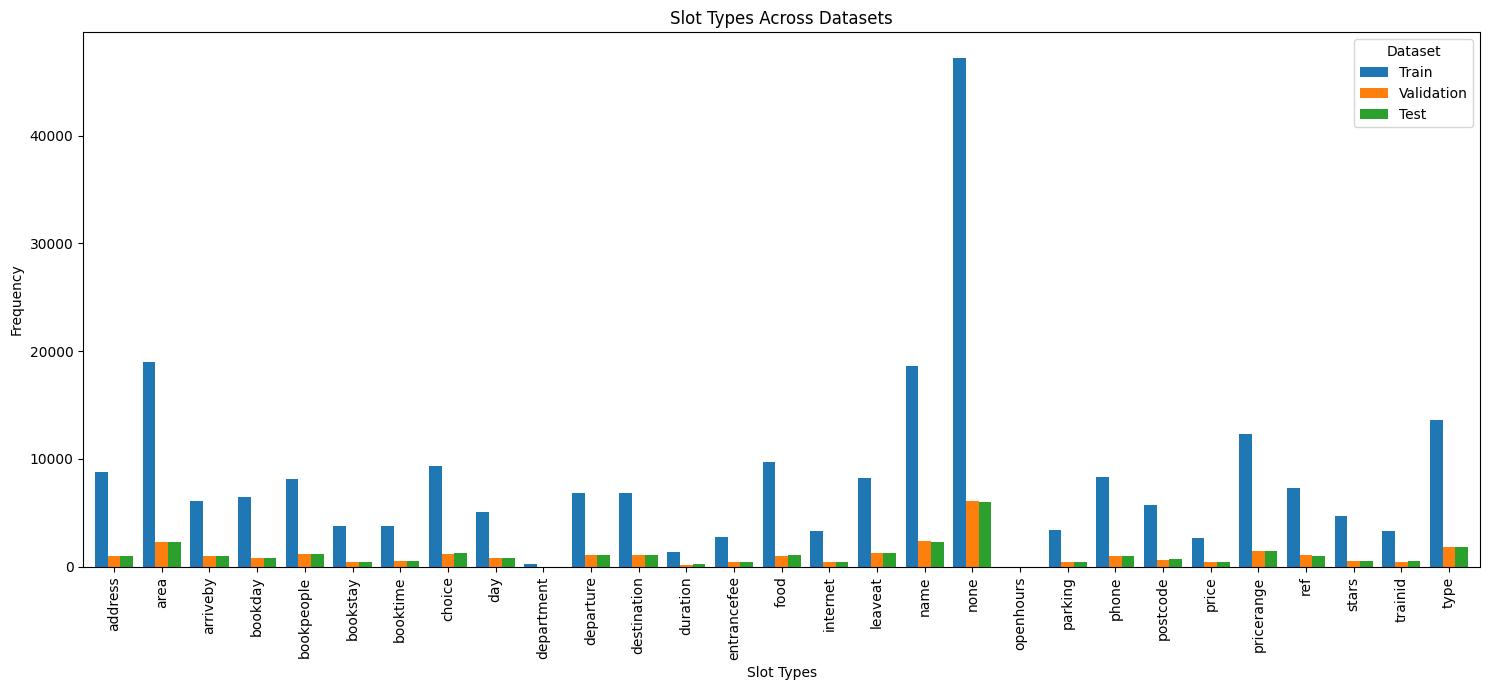

In [45]:
import matplotlib.pyplot as plt

# Số lượng mẫu trong các tập dữ liệu
data_lengths = {
    "Train": data_stat["train_len"],
    "Validation": data_stat["validation_len"],
    "Test": data_stat["test_len"],
}

# Vẽ biểu đồ cột
plt.bar(data_lengths.keys(), data_lengths.values(), color=["blue", "orange", "green"])
plt.title("Number of Samples in Each Dataset")
plt.xlabel("Dataset")
plt.ylabel("Number of Samples")
plt.savefig("data_lengths.png")
plt.show()

from matplotlib_venn import venn3

# Tập hợp các dịch vụ
train_services = set(data_stat["train_services"])
val_services = set(data_stat["validation_services"])
test_services = set(data_stat["test_services"])

# Vẽ biểu đồ Venn
venn3([train_services, val_services, test_services], ("Train", "Validation", "Test"), alpha=0.5)
plt.title("Service Overlap Between Datasets")
plt.savefig("service_overlap.png")
plt.show()

import pandas as pd

# Đếm số lượng act_types
train_act_counts = data_stat["train_act_types"]
val_act_counts = data_stat["validation_act_types"]
test_act_counts = data_stat["test_act_types"]

# Tạo DataFrame
# Chuyển act_types từ set sang list
act_types = sorted(
    set(train_act_counts.keys())
    | set(val_act_counts.keys())
    | set(test_act_counts.keys())
)

# Tạo DataFrame
act_df = pd.DataFrame(index=act_types)
act_df["Train"] = [train_act_counts.get(act, 0) for act in act_types]
act_df["Validation"] = [val_act_counts.get(act, 0) for act in act_types]
act_df["Test"] = [test_act_counts.get(act, 0) for act in act_types]

# Vẽ biểu đồ cột nhóm
act_df.plot(kind="bar", figsize=(15, 7), width=0.8)
plt.title("Act Types Across Datasets")
plt.xlabel("Act Types")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(title="Dataset")
plt.tight_layout()
plt.savefig("act_types.png")
plt.show()

# Đếm số lượng act_slots
train_slots = data_stat["train_act_slots"]
val_slots = data_stat["validation_act_slots"]
test_slots = data_stat["test_act_slots"]

# Tạo DataFrame
# Chuyển đổi slot_types từ set sang list và sắp xếp
slot_types = sorted(
    set(train_slots.keys()) | set(val_slots.keys()) | set(test_slots.keys())
)

# Tạo DataFrame
slot_df = pd.DataFrame(index=slot_types)
slot_df["Train"] = [train_slots.get(slot, 0) for slot in slot_types]
slot_df["Validation"] = [val_slots.get(slot, 0) for slot in slot_types]
slot_df["Test"] = [test_slots.get(slot, 0) for slot in slot_types]

# Vẽ biểu đồ cột nhóm
slot_df.plot(kind="bar", figsize=(15, 7), width=0.8)
plt.title("Slot Types Across Datasets")
plt.xlabel("Slot Types")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(title="Dataset")
plt.tight_layout()
plt.savefig("slot_types.png")
plt.show()

# Get raw dataset

In [2]:
# type(dataset['train'])
# print(dataset['train']['turns'][0].keys())
# print(len(dataset['train']['turns'][0]["dialogue_acts"]))
# print(dataset['train']['turns'][0]["dialogue_acts"][0]["span_info"])
# print(dataset['train']['turns'][0]["dialogue_acts"][0].keys())
# print(dataset['train']['turns'][0]['turn_id'])

# dict_keys(['turn_id', 'speaker', 'utterance', 'frames', 'dialogue_acts'])
# 12
# {'act_type': ['Restaurant-Inform', 'Restaurant-Inform'], 'act_slot_name': ['area', 'pricerange'], 'act_slot_value': ['centre', 'expensive'], 'span_start': [30, 43], 'span_end': [36, 52]}
# dict_keys(['dialog_act', 'span_info'])
# ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [2]:
data_train = []
data_validation = []
data_test = []

count = 0
for split in ["train", "validation", "test"]:
    if split == "train":
        data = data_train
    elif split == "validation":
        data = data_validation
    elif split == "test":
        data = data_test

    for index_dialogue in range(len(dataset[split]["dialogue_id"])):
        dialogue_id = dataset[split]["dialogue_id"][index_dialogue]
        for index_turn in range(len(dataset[split]["turns"][index_dialogue]['turn_id'])):
            # try:
                record = [None] * 4
                record[0] = dialogue_id
                record[1] = dataset[split]["turns"][index_dialogue]["turn_id"][index_turn]
                record[2] = dataset[split]["turns"][index_dialogue]["utterance"][index_turn]
                record[3] = dataset[split]["turns"][index_dialogue]["dialogue_acts"][index_turn]["span_info"]
                data.append(record)
            # except:
                # print('Error: ', dataset[split]["turns"][index_dialogue])
                # count += 1
                # print(split, index_dialogue, index_turn, count, "|", len(dataset[split]["turns"][index_dialogue]["utterance"]), "|", len(dataset[split]["turns"][index_dialogue]["dialogue_acts"]))


In [4]:
# print("số mẫu dữ liệu:", len(data_train), len(data_validation), len(data_test))
# print("Sum = " + str(len(data_train) + len(data_validation) + len(data_test)))
# print("Ví dụ:", data_train[0])

# số mẫu dữ liệu: 113552 14748 14744
# Sum = 143044
# Ví dụ: ['PMUL4398.json', '0', 'i need a place to dine in the center thats expensive', {'act_type': ['Restaurant-Inform', 'Restaurant-Inform'], 'act_slot_name': ['area', 'pricerange'], 'act_slot_value': ['centre', 'expensive'], 'span_start': [30, 43], 'span_end': [36, 52]}]

In [3]:
import re

def create_bio_labels(utterance, spans, slot_names):
    # Tách câu thành các token
    tokens = re.findall(r'\w+|[^\w\s]', utterance, re.UNICODE)
    
    # Khởi tạo nhãn BIO cho các token
    bio_labels = ['O'] * len(tokens)
    
    # Duyệt qua từng span
    for start, end, slot_name in zip(spans['span_start'], spans['span_end'], slot_names):
        # Xác định vị trí token đầu tiên và cuối cùng của span
        token_start = len(re.findall(r'\w+|[^\w\s]', utterance[:start]))
        token_end = len(re.findall(r'\w+|[^\w\s]', utterance[:end]))
        
        # Gán nhãn BIO cho các token trong span
        if token_start < len(tokens):
            bio_labels[token_start] = f'B-{slot_name}'
        for i in range(token_start + 1, min(token_end, len(tokens))):
            bio_labels[i] = f'I-{slot_name}'
    
    return tokens, bio_labels


In [6]:
# def get raw_data(data):
#     # data is data_train, data_validation, or data_test
#     X_token_classification = []
#     y_token_classification = []
#     y_act = []

#     # Lặp qua các dữ liệu train
#     for item in data:
#         # Câu thoại (utterance)
#         utterance = item[2]  # Câu trong vị trí thứ 2

#         # Các nhãn act_type và act_slot_name từ `dialogue_acts`
#         dialogue_acts = item[3]  # Nhận phần dialogue_acts
#         span_start = dialogue_acts['span_start']
#         span_end = dialogue_acts['span_end']
#         act_slot_name = dialogue_acts['act_slot_name']

#         # Gán nhãn BIO cho các token trong câu
#         tokens, bio_labels = create_bio_labels(utterance, {'span_start': span_start, 'span_end': span_end}, act_slot_name)

#         # Lưu các token và nhãn
#         X_token_classification.append(tokens)
#         y_token_classification.append(bio_labels)
#         y_act.append(act_slot_name)
#     return X_token_classification, y_token_classification

# # In ra kết quả thử nghiệm
# print("X_token_classification:", X_token_classification[0])
# print("y_token_classification:", y_token_classification[0])

# # In ra kết quả thử nghiệm
# print("X_token_classification:", X_token_classification[20])
# print("y_token_classification:", y_token_classification[20])

# # In ra kết quả thử nghiệm
# print("X_token_classification:", X_token_classification[200])
# print("y_token_classification:", y_token_classification[200])

# # Len dữ liệu
# print("Số lượng dữ liệu:", len(X_token_classification), len(y_token_classification))

# X_token_classification: ['i', 'need', 'a', 'place', 'to', 'dine', 'in', 'the', 'center', 'thats', 'expensive']
# y_token_classification: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-area', 'O', 'B-pricerange']
# X_token_classification: ['How', 'about', 'for', '3', 'nights', '?']
# y_token_classification: ['O', 'O', 'O', 'B-bookstay', 'O', 'O']
# X_token_classification: ['Find', 'me', 'a', 'train', 'that', 'leaves', 'on', 'Sunday', 'after', '14', ':', '00', 'please']
# y_token_classification: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-day', 'O', 'B-leaveat', 'I-leaveat', 'I-leaveat', 'O']
# Số lượng dữ liệu: 113552 113552

In [7]:
# # Get all unique labels: act_slot_name
# unique_labels = set(label for labels in y_token_classification for label in labels)
# print("Unique labels:", sorted(unique_labels))

# Unique labels: ['B-address', 'B-area', 'B-arriveby', 'B-bookday', 'B-bookpeople', 'B-bookstay', 'B-booktime', 'B-choice', 'B-day', 'B-department', 'B-departure', 'B-destination', 'B-duration', 'B-entrancefee', 'B-food', 'B-leaveat', 'B-name', 'B-openhours', 'B-phone', 'B-postcode', 'B-price', 'B-pricerange', 'B-ref', 'B-stars', 'B-trainid', 'B-type', 'I-address', 'I-area', 'I-arriveby', 'I-bookday', 'I-bookpeople', 'I-bookstay', 'I-booktime', 'I-choice', 'I-day', 'I-department', 'I-departure', 'I-destination', 'I-duration', 'I-entrancefee', 'I-food', 'I-leaveat', 'I-name', 'I-openhours', 'I-phone', 'I-postcode', 'I-price', 'I-pricerange', 'I-ref', 'I-stars', 'I-trainid', 'I-type', 'O']


In [8]:
# # Get all unique labels: act_type
# act_types = []
# for record in data_train:
#     act_types.extend(record[3]['act_type'])
# print("Unique act_types:", sorted(set(act_types)))
# print("Len act_types:", len(set(act_types)))

# # Get all unique labels: act_type
# act_types = []
# for record in data_validation:
#     act_types.extend(record[3]['act_type'])
# print("Unique act_types:", sorted(set(act_types)))
# print("Len act_types:", len(set(act_types)))

# # Get all unique labels: act_type
# act_types = []
# for record in data_test:
#     act_types.extend(record[3]['act_type'])
# print("Unique act_types:", sorted(set(act_types)))
# print("Len act_types:", len(set(act_types)))

# Unique act_types: ['Attraction-Inform', 'Attraction-NoOffer', 'Attraction-Recommend', 'Attraction-Select', 'Booking-Book', 'Booking-Inform', 'Booking-NoBook', 'Hospital-Inform', 'Hotel-Inform', 'Hotel-NoOffer', 'Hotel-Recommend', 'Hotel-Select', 'Police-Inform', 'Restaurant-Inform', 'Restaurant-NoOffer', 'Restaurant-Recommend', 'Restaurant-Select', 'Taxi-Inform', 'Train-Inform', 'Train-NoOffer', 'Train-OfferBook', 'Train-OfferBooked', 'Train-Select']
# Len act_types: 23
# Unique act_types: ['Attraction-Inform', 'Attraction-NoOffer', 'Attraction-Recommend', 'Attraction-Select', 'Booking-Book', 'Booking-Inform', 'Booking-NoBook', 'Hospital-Inform', 'Hotel-Inform', 'Hotel-NoOffer', 'Hotel-Recommend', 'Hotel-Select', 'Restaurant-Inform', 'Restaurant-NoOffer', 'Restaurant-Recommend', 'Restaurant-Select', 'Taxi-Inform', 'Train-Inform', 'Train-NoOffer', 'Train-OfferBook', 'Train-OfferBooked', 'Train-Select']
# Len act_types: 22
# Unique act_types: ['Attraction-Inform', 'Attraction-NoOffer', 'Attraction-Recommend', 'Attraction-Select', 'Booking-Book', 'Booking-Inform', 'Booking-NoBook', 'Hotel-Inform', 'Hotel-NoOffer', 'Hotel-Recommend', 'Hotel-Select', 'Police-Inform', 'Restaurant-Inform', 'Restaurant-NoOffer', 'Restaurant-Recommend', 'Restaurant-Select', 'Taxi-Inform', 'Train-Inform', 'Train-NoOffer', 'Train-OfferBook', 'Train-OfferBooked', 'Train-Select']
# Len act_types: 22

In [4]:
import numpy as np

def get_raw_data(data):
    # data is data_train, data_validation, or data_test
    X_token_classification = []
    y_token_classification = []
    y_act = []

    # Tạo từ điển ánh xạ nhãn BIO thành chỉ số
    bio_labels = [
        "O",
        "B-address", "B-area", "B-arriveby", "B-bookday", "B-bookpeople", "B-bookstay", "B-booktime",
        "B-choice", "B-day", "B-department", "B-departure", "B-destination", "B-duration", "B-entrancefee", 
        "B-food", "B-leaveat", "B-name", "B-openhours", "B-phone", "B-postcode", "B-price", "B-pricerange", 
        "B-ref", "B-stars", "B-trainid", "B-type", "I-address", "I-area", "I-arriveby", "I-bookday", 
        "I-bookpeople", "I-bookstay", "I-booktime", "I-choice", "I-day", "I-department", "I-departure", 
        "I-destination", "I-duration", "I-entrancefee", "I-food", "I-leaveat", "I-name", "I-openhours", 
        "I-phone", "I-postcode", "I-price", "I-pricerange", "I-ref", "I-stars", "I-trainid", "I-type"
    ]

    # Tạo từ điển ánh xạ nhãn BIO thành chỉ số
    label_to_id = {label: idx for idx, label in enumerate(bio_labels)}

    # Tạo từ điển ánh xạ nhãn act_type thành chỉ số
    unique_act_types = [
        "None", "Attraction-Inform", "Attraction-NoOffer", "Attraction-Recommend", "Attraction-Select",
        "Booking-Book", "Booking-Inform", "Booking-NoBook", "Hospital-Inform", "Hotel-Inform", "Hotel-NoOffer", 
        "Hotel-Recommend", "Hotel-Select", "Police-Inform", "Restaurant-Inform", "Restaurant-NoOffer", 
        "Restaurant-Recommend", "Restaurant-Select", "Taxi-Inform", "Train-Inform", "Train-NoOffer", 
        "Train-OfferBook", "Train-OfferBooked", "Train-Select"
    ]
    act_type_to_id = {act_type: idx for idx, act_type in enumerate(unique_act_types)}

    # Lặp qua các dữ liệu train
    for item in data:
        # Câu thoại (utterance)
        utterance = item[2]  # Câu trong vị trí thứ 2

        # Các nhãn act_type và act_slot_name từ `dialogue_acts`
        dialogue_acts = item[3]  # Nhận phần dialogue_acts
        span_start = dialogue_acts["span_start"]
        span_end = dialogue_acts["span_end"]
        act_slot_name = dialogue_acts["act_slot_name"]
        act_type = dialogue_acts["act_type"]  # Nhãn act_type

        # Gán nhãn BIO cho các token trong câu
        tokens, bio_labels_for_tokens = create_bio_labels(
            utterance, {"span_start": span_start, "span_end": span_end}, act_slot_name
        )

        # Lưu các token và nhãn BIO
        X_token_classification.append(tokens)

        # Chuyển nhãn BIO thành chỉ số
        y_token_classification.append(
            [label_to_id[label] for label in bio_labels_for_tokens]
        )

        # Khởi tạo ma trận one-hot cho các hành động
        act_type_one_hot = np.zeros(len(unique_act_types))

        # Nếu có nhiều hành động, đặt giá trị 1 cho những hành động xuất hiện trong `act_type`
        for act in act_type:
            act_type_id = act_type_to_id[act]
            act_type_one_hot[act_type_id] = 1  # Gán 1 cho các vị trí của các hành động xuất hiện

        # Append vào y_act
        y_act.append(act_type_one_hot)

    return X_token_classification, y_token_classification, y_act


In [5]:
X_token_classification_train, y_token_classification_train, y_act_train = get_raw_data(data_train)
X_token_classification_val, y_token_classification_val, y_act_val = get_raw_data(data_validation)
X_token_classification_test, y_token_classification_test, y_act_test = get_raw_data(data_test)

In [6]:
# print("Số lượng dữ liệu:", len(X_token_classification_train), len(y_token_classification_train), len(y_act_train))
# print(X_token_classification_train[0])
# print(y_token_classification_train[0])
# print(y_act_train[197])
# print(len(y_act_train[11355]))

# Số lượng dữ liệu: 113552 113552 113552
# ['i', 'need', 'a', 'place', 'to', 'dine', 'in', 'the', 'center', 'thats', 'expensive']
# [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 22]
# [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
# 24

In [7]:
# %pip install kagglehub

In [8]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("watts2/glove6b50dtxt")

# print("Path to dataset files:", path)

In [9]:
# %mv /home/harito/.cache/kagglehub/datasets/watts2/glove6b50dtxt/versions/1 .

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, TimeDistributed, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

bio_labels = [
        "O",
        "B-address", "B-area", "B-arriveby", "B-bookday", "B-bookpeople", "B-bookstay", "B-booktime",
        "B-choice", "B-day", "B-department", "B-departure", "B-destination", "B-duration", "B-entrancefee", 
        "B-food", "B-leaveat", "B-name", "B-openhours", "B-phone", "B-postcode", "B-price", "B-pricerange", 
        "B-ref", "B-stars", "B-trainid", "B-type", "I-address", "I-area", "I-arriveby", "I-bookday", 
        "I-bookpeople", "I-bookstay", "I-booktime", "I-choice", "I-day", "I-department", "I-departure", 
        "I-destination", "I-duration", "I-entrancefee", "I-food", "I-leaveat", "I-name", "I-openhours", 
        "I-phone", "I-postcode", "I-price", "I-pricerange", "I-ref", "I-stars", "I-trainid", "I-type"
    ]
    
# Hyperparameters
EMBEDDING_DIM = 50
MAX_SEQUENCE_LENGTH = 50  # Giới hạn độ dài của câu
NUM_CLASSES_ACT = 24  # Số loại hành động
NUM_CLASSES_SLOT = len(bio_labels)  # Số nhãn BIO

# Load GloVe
def load_glove(glove_file):
    embeddings_index = {}
    with open(glove_file, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Chuẩn bị Embedding Matrix
def create_embedding_matrix(word_index, embeddings_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


2024-12-31 23:19:18.138792: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-31 23:19:18.411903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735661958.520607  568135 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735661958.550713  568135 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-31 23:19:18.804085: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [11]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True, oov_token='<OOV>')
tokenizer.fit_on_texts(X_token_classification_train)
word_index = tokenizer.word_index

# Load GloVe
glove_file = '1/glove.6B.50d.txt'
embeddings_index = load_glove(glove_file)

# Create embedding matrix
embedding_matrix = create_embedding_matrix(word_index, embeddings_index, EMBEDDING_DIM)

# Convert sentences to sequences
X_train_seq = tokenizer.texts_to_sequences(X_token_classification_train)
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Prepare y_token_classification (convert to one-hot)
num_slot_labels = 53  # Số lượng nhãn token classification (sửa theo nhu cầu)
y_train_padded = pad_sequences(y_token_classification_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y_train_padded_one_hot = np.array([to_categorical(y, num_classes=num_slot_labels) for y in y_train_padded])

# Prepare y_act (one-hot cho action classification)
y_act_one_hot = np.array(y_act_train)

# Chuẩn bị tập validation và test
X_val_seq = tokenizer.texts_to_sequences(X_token_classification_val)
X_val_padded = pad_sequences(X_val_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y_val_padded = pad_sequences(y_token_classification_val, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y_val_padded_one_hot = np.array([to_categorical(y, num_classes=num_slot_labels) for y in y_val_padded])
y_act_val_one_hot = np.array(y_act_val)

X_test_seq = tokenizer.texts_to_sequences(X_token_classification_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y_test_padded = pad_sequences(y_token_classification_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y_test_padded_one_hot = np.array([to_categorical(y, num_classes=num_slot_labels) for y in y_test_padded])
y_act_test_one_hot = np.array(y_act_test)


In [15]:
# Model
input_seq = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")
embedding = Embedding(
    input_dim=len(word_index) + 1,
    output_dim=EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_SEQUENCE_LENGTH,
    trainable=False,
)(input_seq)

# BiLSTM
bilstm = Bidirectional(LSTM(64, return_sequences=True))(embedding)

# Slot prediction
slot_output = TimeDistributed(
    Dense(NUM_CLASSES_SLOT, activation="softmax"), name="slot_output"
)(bilstm)

# Action prediction
sentence_representation = GlobalAveragePooling1D()(bilstm)
action_output = Dense(NUM_CLASSES_ACT, activation="softmax", name="action_output")(
    sentence_representation
)

# Model compilation
model = Model(inputs=input_seq, outputs=[slot_output, action_output])
model.compile(
    optimizer="adam",
    loss={
        "slot_output": "categorical_crossentropy",
        "action_output": "categorical_crossentropy",
    },
    metrics={"slot_output": ["accuracy"], "action_output": ["accuracy"]},
)

# Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 50, 50)    │    730,150 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 50, 128)   │     58,880 │ embedding_1[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ bidirectional_1[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ slot_output         │ (None, 50, 53)    │      6,837 │ bidirectional_1[… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ action_output       │ (None, 24)        │      3,096 │ global_average_p… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 798,963 (3.05 MB)

 Trainable params: 68,813 (268.80 KB)

 Non-trainable params: 730,150 (2.79 MB)

In [ ]:
history = model.fit(
    X_train_padded,  # Đầu vào cho mô hình (X_train_padded)
    {
        "slot_output": y_train_padded_one_hot,  # Đầu ra cho slot_output (shape: (None, 50, 53))
        "action_output": y_act_one_hot,  # Đầu ra cho action_output (shape: (None, 24))
    },
    validation_data=(
        X_val_padded,  # Đầu vào validation (X_val_padded)
        {
            "slot_output": y_val_padded_one_hot,  # Đầu ra validation cho slot_output (shape: (None, 50, 53))
            "action_output": y_act_val_one_hot,  # Đầu ra validation cho action_output (shape: (None, 24))
        },
    ),
    epochs=10,
    batch_size=64,
)


# Truy xuất metrics từ lịch sử huấn luyện
print("Available metrics:", history.history.keys())

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 24), output.shape=(None, 50, 53)

: 

In [18]:
# print(f"slot_output: y_train_padded_one_hot.shape={y_train_padded_one_hot.shape}, y_val_padded_one_hot.shape={y_val_padded_one_hot.shape}")
# print(f"action_output: y_act_one_hot.shape={y_act_one_hot.shape}, y_act_val_one_hot.shape={y_act_val_one_hot.shape}")

# slot_output: y_train_padded_one_hot.shape=(113552, 50, 53), y_val_padded_one_hot.shape=(14748, 50, 53)
# action_output: y_act_one_hot.shape=(113552, 24), y_act_val_one_hot.shape=(14748, 24)


In [ ]:
# Đánh giá trên tập test
print("Evaluating on test set...")
results = model.evaluate(X_test_padded,
                         {'slot_output': y_test_padded, 'action_output': y_act_test_one_hot})

# Dự đoán trên tập test
y_pred_slot, y_pred_action = model.predict(X_test_padded)

# Chuyển y_pred_slot và y_pred_action về nhãn
y_pred_slot_labels = np.argmax(y_pred_slot, axis=-1)  # Slot prediction
y_pred_action_labels = np.argmax(y_pred_action, axis=-1)  # Action prediction
y_true_action_labels = np.argmax(y_act_test_one_hot, axis=-1)

# Flatten y_true and y_pred for slot prediction
y_true_slot_flatten = y_test_padded.flatten()
y_pred_slot_flatten = y_pred_slot_labels.flatten()

# Loại bỏ các padding token trong slot
mask = y_true_slot_flatten != 0  # Giả sử nhãn 0 là padding
y_true_slot_flatten = y_true_slot_flatten[mask]
y_pred_slot_flatten = y_pred_slot_flatten[mask]

# Báo cáo đánh giá
print("Slot Classification Metrics:")
print(classification_report(y_true_slot_flatten, y_pred_slot_flatten, target_names=bio_labels, zero_division=0))

print("Action Classification Metrics:")
print(classification_report(y_true_action_labels, y_pred_action_labels, zero_division=0))

# Tính F1, Recall, Precision cho từng đầu ra
slot_f1 = f1_score(y_true_slot_flatten, y_pred_slot_flatten, average='weighted')
slot_recall = recall_score(y_true_slot_flatten, y_pred_slot_flatten, average='weighted')
slot_precision = precision_score(y_true_slot_flatten, y_pred_slot_flatten, average='weighted')

action_f1 = f1_score(y_true_action_labels, y_pred_action_labels, average='weighted')
action_recall = recall_score(y_true_action_labels, y_pred_action_labels, average='weighted')
action_precision = precision_score(y_true_action_labels, y_pred_action_labels, average='weighted')

print(f"Slot - F1: {slot_f1}, Recall: {slot_recall}, Precision: {slot_precision}")
print(f"Action - F1: {action_f1}, Recall: {action_recall}, Precision: {action_precision}")
